# Trees and Forests

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('bmh')
plt.rcParams['lines.markeredgecolor'] = 'w'
plt.rcParams['lines.markeredgewidth'] = 0.5
plt.rcParams['figure.figsize'] = [8, 6]

# Example revisited

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome (Ts65Dn) mice exposed to context fear conditioning.

https://www.kaggle.com/ruslankl/mice-protein-expression

In [2]:
import pandas as pd
df = pd.read_csv('Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


Goal is to use protein expression levels to classify mice. Each mouse in the dataset belongs to one of the following eight classes:

1. c-CS-s: control mice,  stimulated to learn,      injected with saline
2. c-CS-m: control mice,  stimulated to learn,      injected with memantine
3. c-SC-s: control mice,  not stimulated to learn,  injected with saline
4. c-SC-m: control mice,  not stimulated to learn,  injected with memantine
5. t-CS-s: trisomy mice,  stimulated to learn,      injected with saline
6. t-CS-m: trisomy mice,  stimulated to learn,      injected with memantine
7. t-SC-s: trisomy mice,  not stimulated to learn,  injected with saline
8. t-SC-m: trisomy mice,  not stimulated to learn,  injected with memantine

which are combinations of:

* Control vs. down syndrome.
* Did or did not recieve behavioral conditioning.
* Saline vs. memantine injection.

First, throw out features and data points with missing measurements.

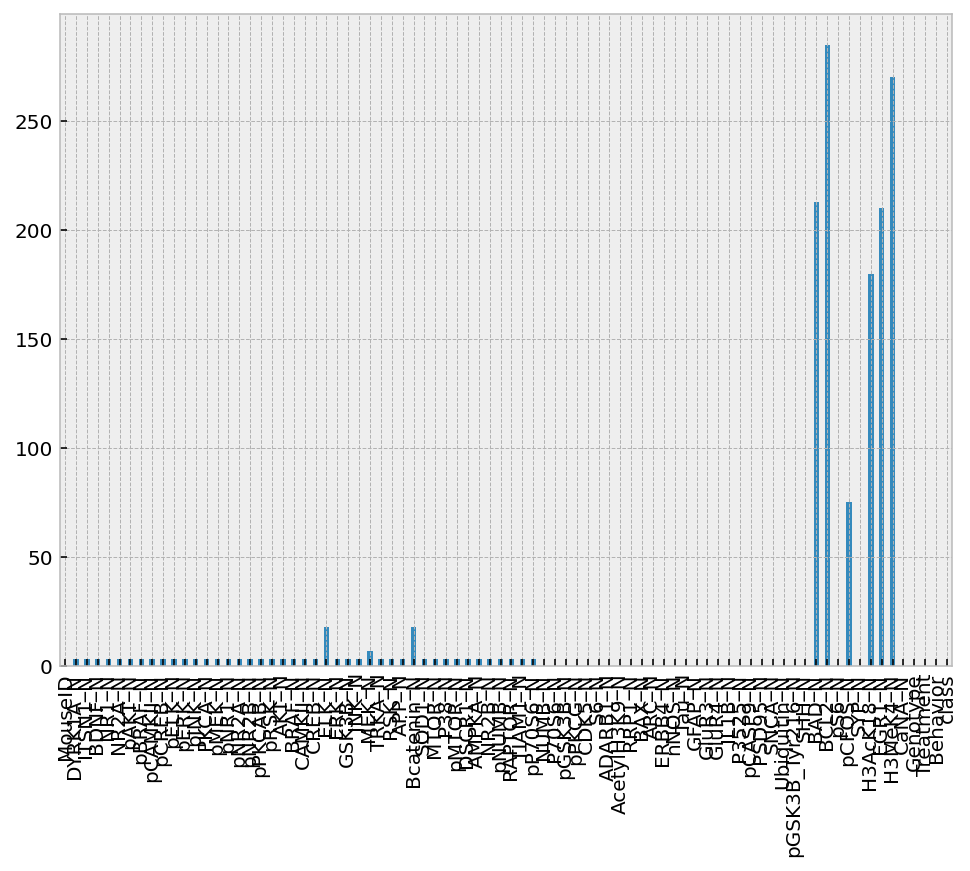

In [3]:
df.isnull().sum().plot.bar();

In [4]:
miss_too_many = df.isnull().sum() > 10

miss_too_many

MouseID      False
DYRK1A_N     False
ITSN1_N      False
BDNF_N       False
NR1_N        False
             ...  
CaNA_N       False
Genotype     False
Treatment    False
Behavior     False
class        False
Length: 82, dtype: bool

In [5]:
miss_too_many.sum()

8

In [6]:
df2 = df.loc[:, ~miss_too_many]

df.shape, df2.shape

((1080, 82), (1080, 74))

In [7]:
df2 = df2.dropna()

df2.shape

(1073, 74)

In [8]:
df2

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,1.261651,0.962942,0.275547,0.115806,0.374088,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,1.254872,0.983690,0.283207,0.113614,0.375259,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,1.242248,0.976609,0.290843,0.118948,0.422121,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,1.301071,0.989286,0.306701,0.125295,0.397676,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [9]:
expr = df2.loc[:,'DYRK1A_N':'CaNA_N']  # just protein expression levels
genotype = df2['Genotype']
treatment = df2['Treatment']
behavior = df2['Behavior']
mouse_class = df2['class']

# Decision Tree

![](images/decision-tree.png)

A decision tree can fit data with a highly irregular mapping between predictors and classes.

![](images/tree-splits.png)

Use a decision tree to predict mouse genotype based on protein experssion profile.

In [10]:
X = expr.to_numpy()
y = genotype.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['Control', 'Ts65Dn'], dtype=object))

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)

model.fit(X, y)

accuracy = model.score(X, y)
accuracy

1.0

In [12]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

model = DecisionTreeClassifier(random_state=0)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accuracy = cross_val_score(model, X, y, cv=kf)
accuracy

array([0.89814815, 0.89814815, 0.89814815, 0.89719626, 0.92523364,
       0.96261682, 0.86915888, 0.87850467, 0.89719626, 0.90654206])

A decision tree tends to overfit the data (i.e., is very sensative to the exact data it is trained on).

Tree depth influences underfitting vs. overfitting.

![](images/tree-split-iters.jpg)

See if you can do better with a different maximal tree depth.

In [13]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth': np.arange(3, 20)}
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv = GridSearchCV(model, param_grid, cv=kf, scoring='accuracy')
cv.fit(X, y)
cv.best_estimator_

DecisionTreeClassifier(max_depth=9, random_state=0)

In [14]:
model = cv.best_estimator_

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accuracy = cross_val_score(model, X, y, cv=kf)
accuracy

array([0.89814815, 0.90740741, 0.89814815, 0.92523364, 0.94392523,
       0.96261682, 0.86915888, 0.87850467, 0.88785047, 0.91588785])

In this case we haven't really improved much over the default of no maximum depth, although we can see that enforcing only a very shallow tree underfits the data.

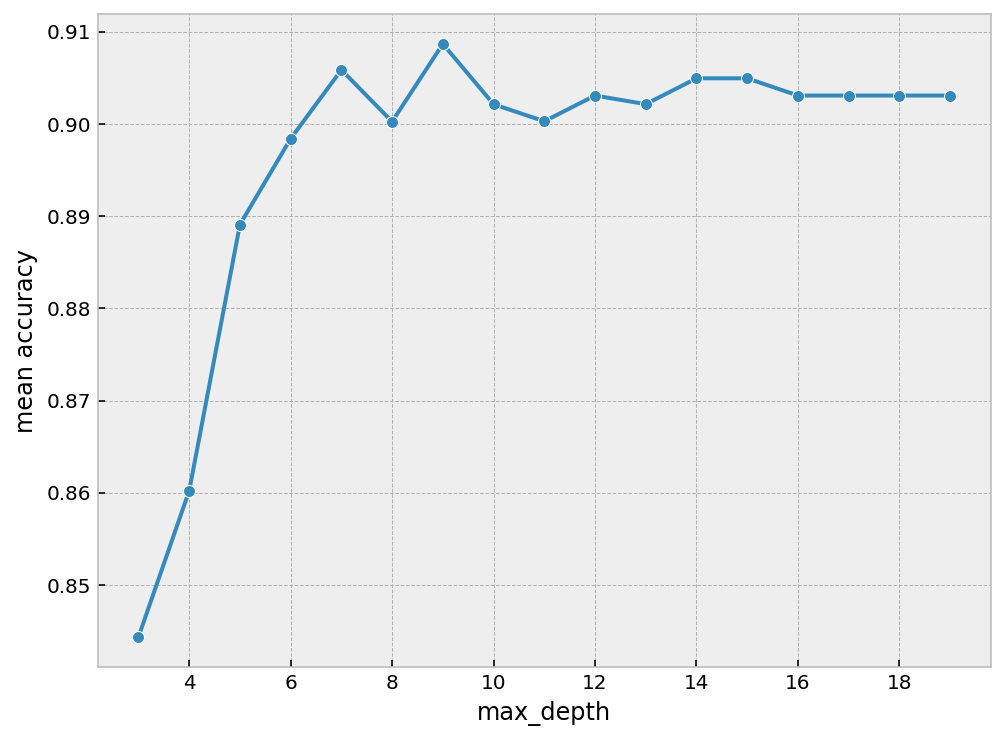

In [15]:
plt.plot(param_grid['max_depth'], cv.cv_results_['mean_test_score'], 'o-')
plt.xlabel('max_depth')
plt.ylabel('mean accuracy');

Thus, we still haven't avoided overfitting.

In [16]:
model = cv.best_estimator_
model.fit(X, y)

accuracy = model.score(X, y)
accuracy

0.9962721342031687

But since a tree depth of anything above about 10 was more or less equally as good, that means splitting the data based on only ~10 proteins is approximatley as good as splitting on all 69 proteins.

But which 10 proteins are the most important?

In [17]:
model.feature_importances_.shape

(69,)

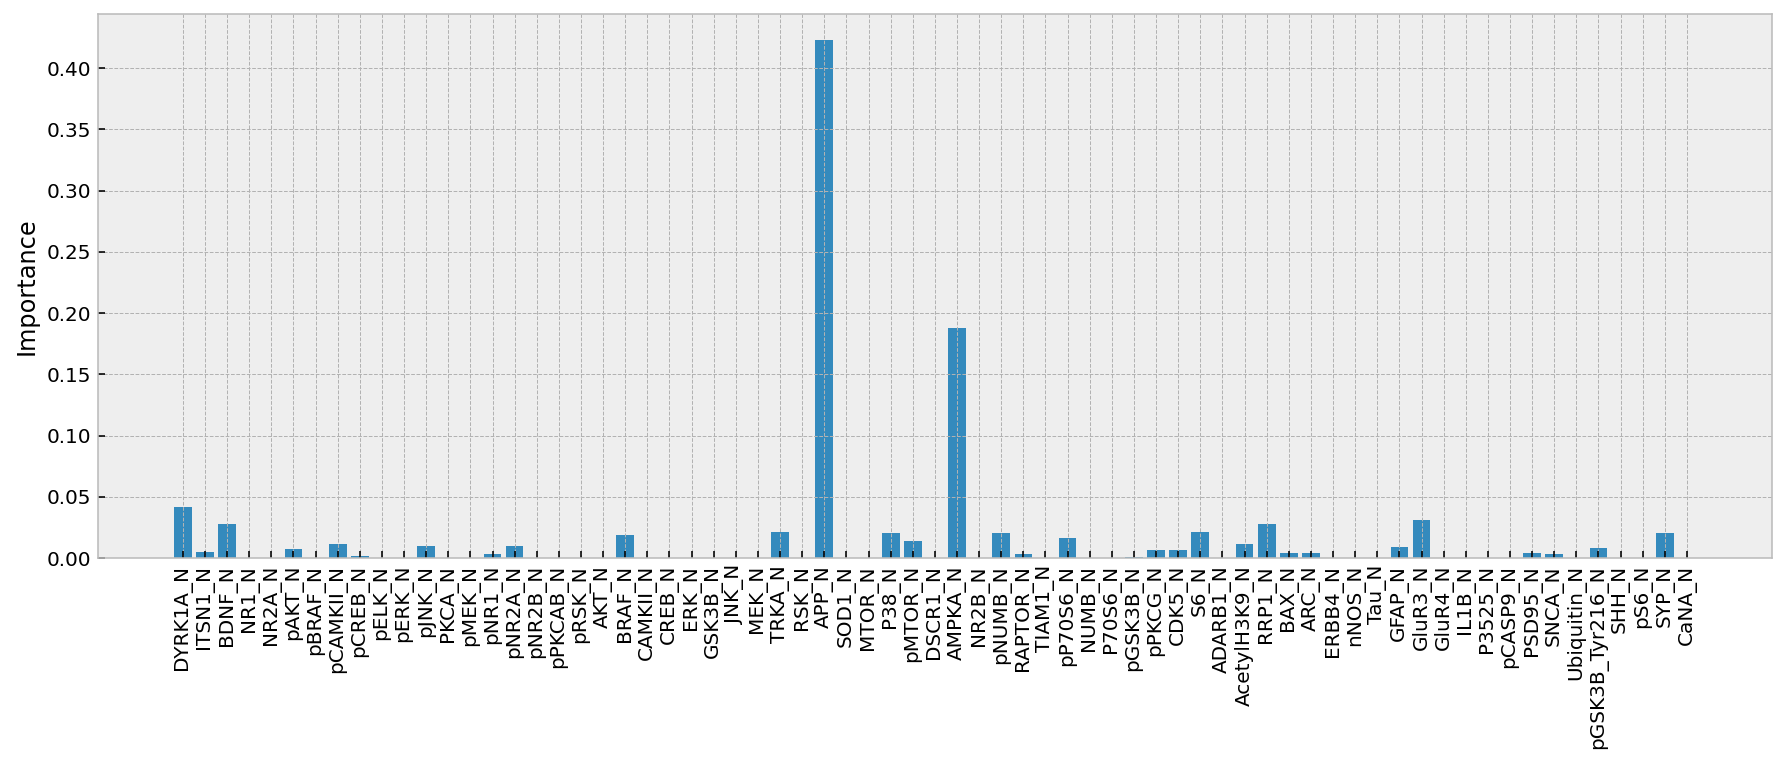

In [18]:
plt.figure(figsize=[15,5])
plt.bar(range(69), model.feature_importances_)
plt.xticks(range(69), expr.columns, rotation=90)
plt.ylabel('Importance');

Try using a decision tree to predict genotype based on only the 10 most important proteins.

In [19]:
sorted_ind = np.argsort(model.feature_importances_)

most_important_cols = sorted_ind[-10:]
most_important_cols

array([32, 67, 27, 46,  2, 49, 56,  0, 35, 29])

In [20]:
expr.columns[most_important_cols]

Index(['P38_N', 'SYP_N', 'TRKA_N', 'S6_N', 'BDNF_N', 'RRP1_N', 'GluR3_N',
       'DYRK1A_N', 'AMPKA_N', 'APP_N'],
      dtype='object')

In [21]:
X10 = X[:,most_important_cols]

model = DecisionTreeClassifier(random_state=0)
model.fit(X10, y)

accuracy = model.score(X10, y)
accuracy

1.0

In [22]:
model = DecisionTreeClassifier(random_state=0)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accuracy = cross_val_score(model, X10, y, cv=kf)
accuracy

array([0.89814815, 0.89814815, 0.92592593, 0.91588785, 0.89719626,
       0.92523364, 0.85046729, 0.87850467, 0.93457944, 0.92523364])

So we have identified 10 proteins that may be sufficient to predict genotype, but our decision tree model is still overfitting the training data and performing more poorly on the validation data.

This tends to be an issue with decision trees.

# Ensemble models

Instead of a single model, you use an average or majority vote amongst an esnemble of many models as your model prediction.

Each model in the ensemble must differ slightly (otherwise what's the point?). This could be because the models themselves are all a bit different and/or each model is trained on slightly different data.

# Random Forest

Create an **ensemble** of many decision trees, where for each tree you...

1. Select a **random subset of features** from the whole set of features.
2. Select a random subset of data points (rows) from the whole dataset with replacement (e.g. a **bootstrapped dataset**).
3. Train the tree on the selected subset of features and bootstrapped data points.

### Bagging (Bootstrap Aggregation)

You then take the the class that is predicted by the most trees as the model prediction.

![](images/random-forest.png)

Image from https://towardsdatascience.com/basic-ensemble-learning-random-forest-adaboost-gradient-boosting-step-by-step-explained-95d49d1e2725

# Question?

Can you think of a reason why a random forest could potentially outperform a single decision tree?

Use a random forest to predict mouse genotype based on protein experssion profile.

In [35]:
X = expr.to_numpy()
y = genotype.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69), (1073,), array(['Control', 'Ts65Dn'], dtype=object))

In [24]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

accuracy = cross_val_score(model, X, y, cv=kf)
accuracy

array([0.98148148, 1.        , 0.98148148, 0.99065421, 0.99065421,
       0.99065421, 0.99065421, 1.        , 1.        , 1.        ])

Pretty nice right off the bat!

By creating an ensemble of many tree classifiers and training each one on different features and bootstrapped subsets, then having each tree vote for the genotype and taking the genotype with the most votes as the model prediction has vastly improved the accuracy on validation data.

Comparing confusion matrices and ROC curves for decision tree and random forest classifiers.

`sklearn.model_selection.cross_val_predict`

![](images/cross_val_predict.png)

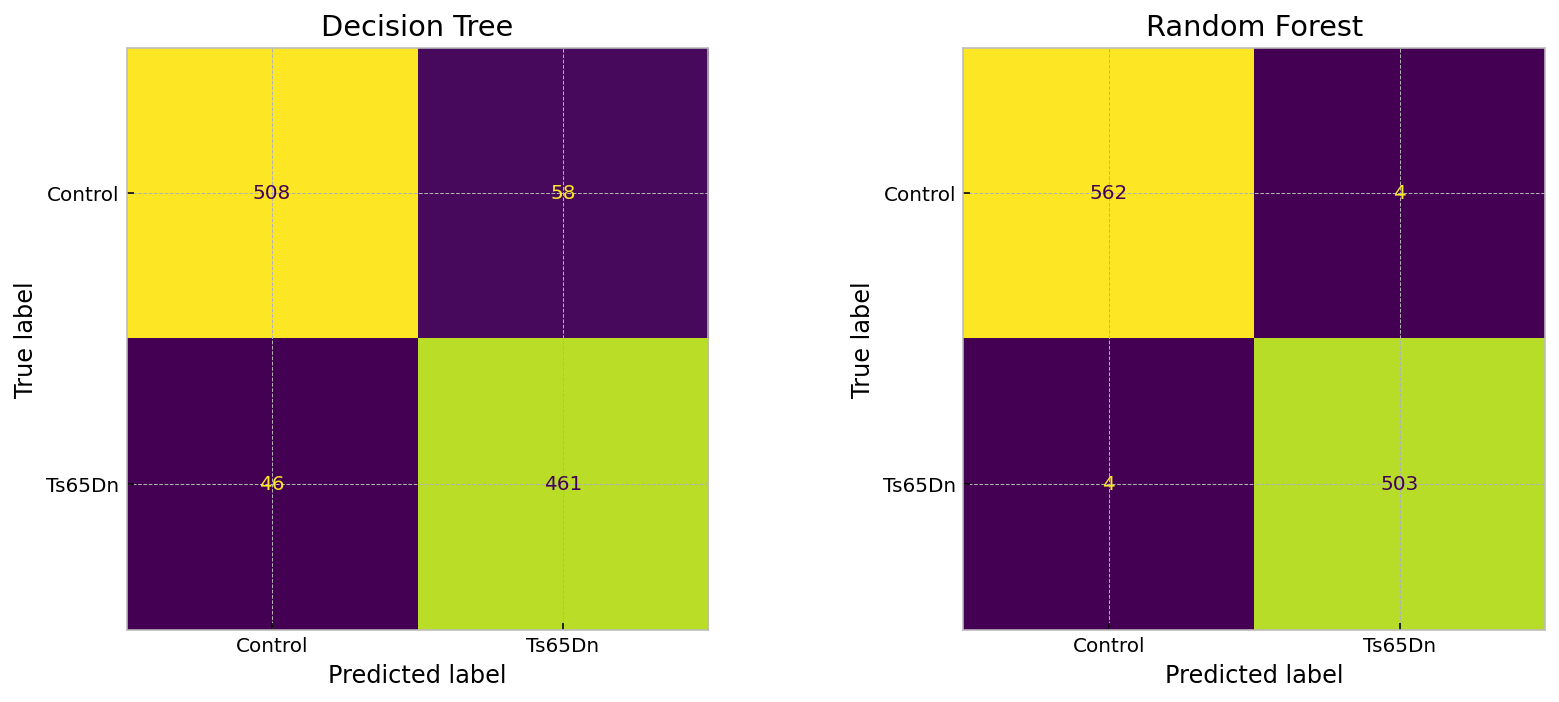

In [41]:
from sklearn.model_selection import cross_val_predict

dtree = DecisionTreeClassifier(random_state=0)
rforest = RandomForestClassifier(n_estimators=100, random_state=0)

models = [dtree, rforest]
model_names = ['Decision Tree', 'Random Forest']

plt.figure(figsize=[12,5])
for i, model in enumerate(models):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    y_pred = cross_val_predict(model, X, y, cv=kf)
    
    ax = plt.subplot(1, len(models), i+1)
    cm = confusion_matrix(y, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
    cmd.plot(ax=ax, colorbar=None)
    plt.title(model_names[i])

plt.tight_layout();

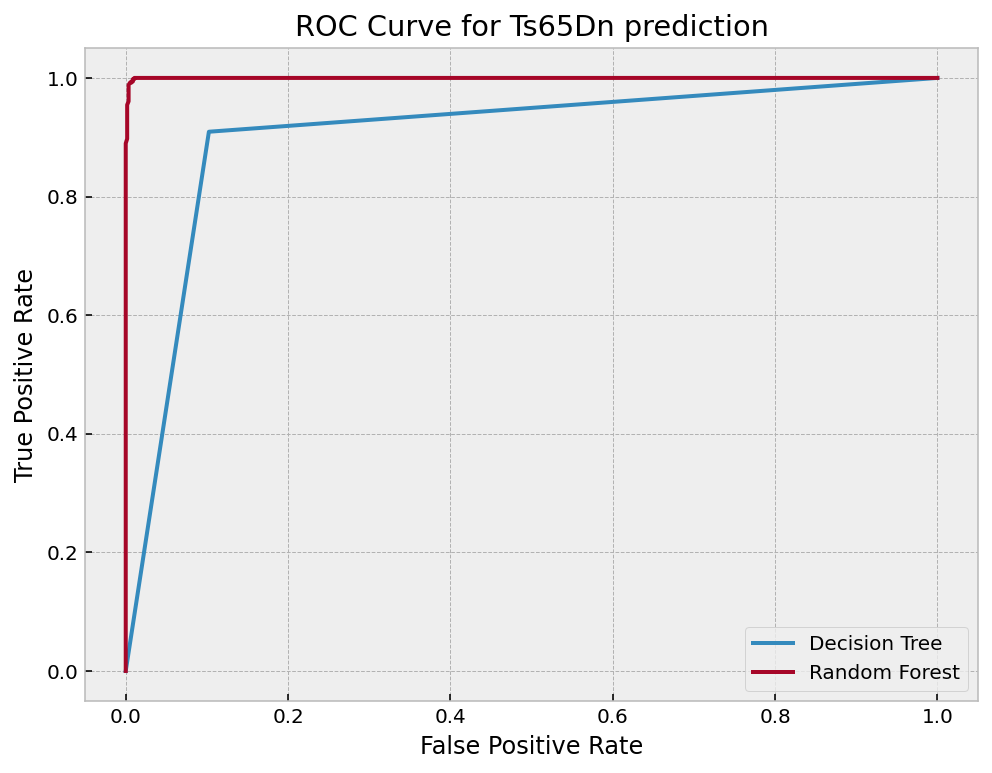

In [43]:
from sklearn.metrics import roc_curve

for i, model in enumerate(models):
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    y_proba = cross_val_predict(model, X, y, cv=kf, method='predict_proba')
    
    # ROC curve for the probability of classifying the genotype of each mouse as Ts65Dn
    class_labels = np.unique(y)
    fpr, tpr, thresholds = roc_curve(y, y_proba[:,1], pos_label=class_labels[1])
    plt.plot(fpr, tpr, label=model_names[i])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ' + class_labels[1] + ' prediction')
plt.legend();

# Exercise

Use a random forest classifier with 100 trees to predict a mouse's class based on its protein expression profile.

Generate a confusion matrix to visualize the classifier's performance.

In [44]:
X = expr.to_numpy()
y = mouse_class.to_numpy()

X.shape, y.shape, np.unique(y)

((1073, 69),
 (1073,),
 array(['c-CS-m', 'c-CS-s', 'c-SC-m', 'c-SC-s', 't-CS-m', 't-CS-s',
        't-SC-m', 't-SC-s'], dtype=object))

# Question

How should you determine how many trees to have in your random forest classifier?

# Exercise

Determine the optimal number of trees to have in your random forest classifier.

Together with `max_depth` what other hyperparameters might be important for a random forest classsifier?

In [29]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators':np.arange(50,301,25),
              'max_features':np.arange(0.1, 1, 0.1),
              'max_depth': np.arange(3, 20),
              'max_samples': [0.3, 0.5, 0.8, 1.0]}
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
cv = RandomizedSearchCV(model, param_grid, cv=kf, scoring='accuracy')
cv.fit(X, y)
cv.best_params_

{'n_estimators': 175,
 'max_samples': 0.8,
 'max_features': 0.30000000000000004,
 'max_depth': 7}

In [45]:
cv.best_estimator_

RandomForestClassifier(max_depth=7, max_features=0.30000000000000004,
                       max_samples=0.8, n_estimators=175, random_state=0)

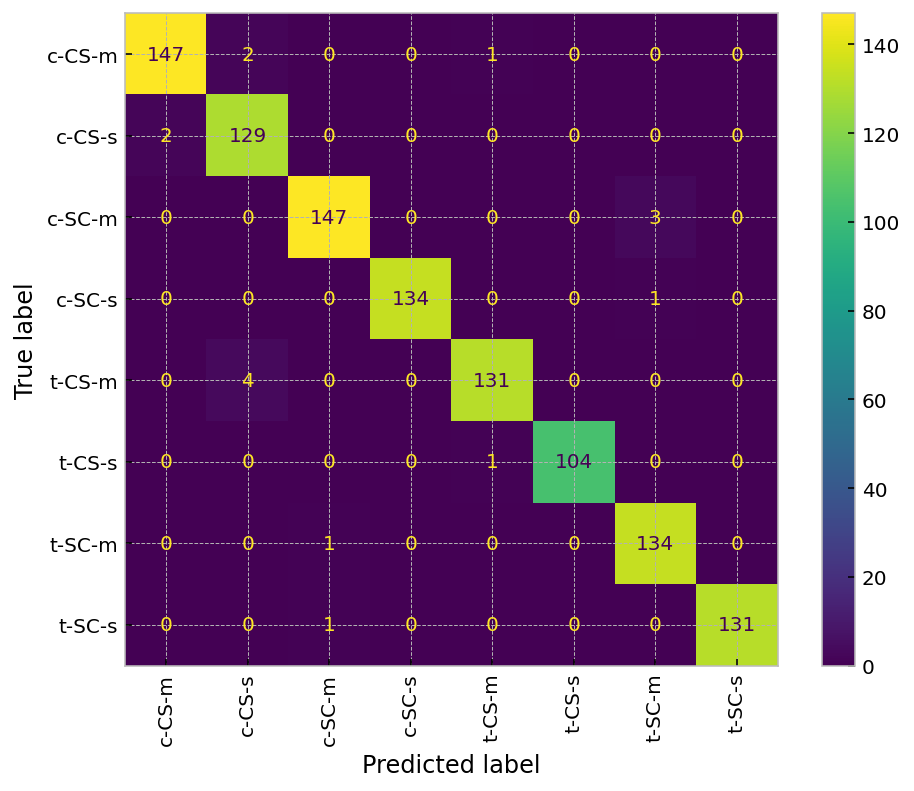

In [46]:
model = cv.best_estimator_

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
y_pred = cross_val_predict(model, X, y, cv=kf)

cm = confusion_matrix(y, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot(xticks_rotation='vertical');

In [33]:
model.fit(X, y)
model.feature_importances_.shape

(69,)

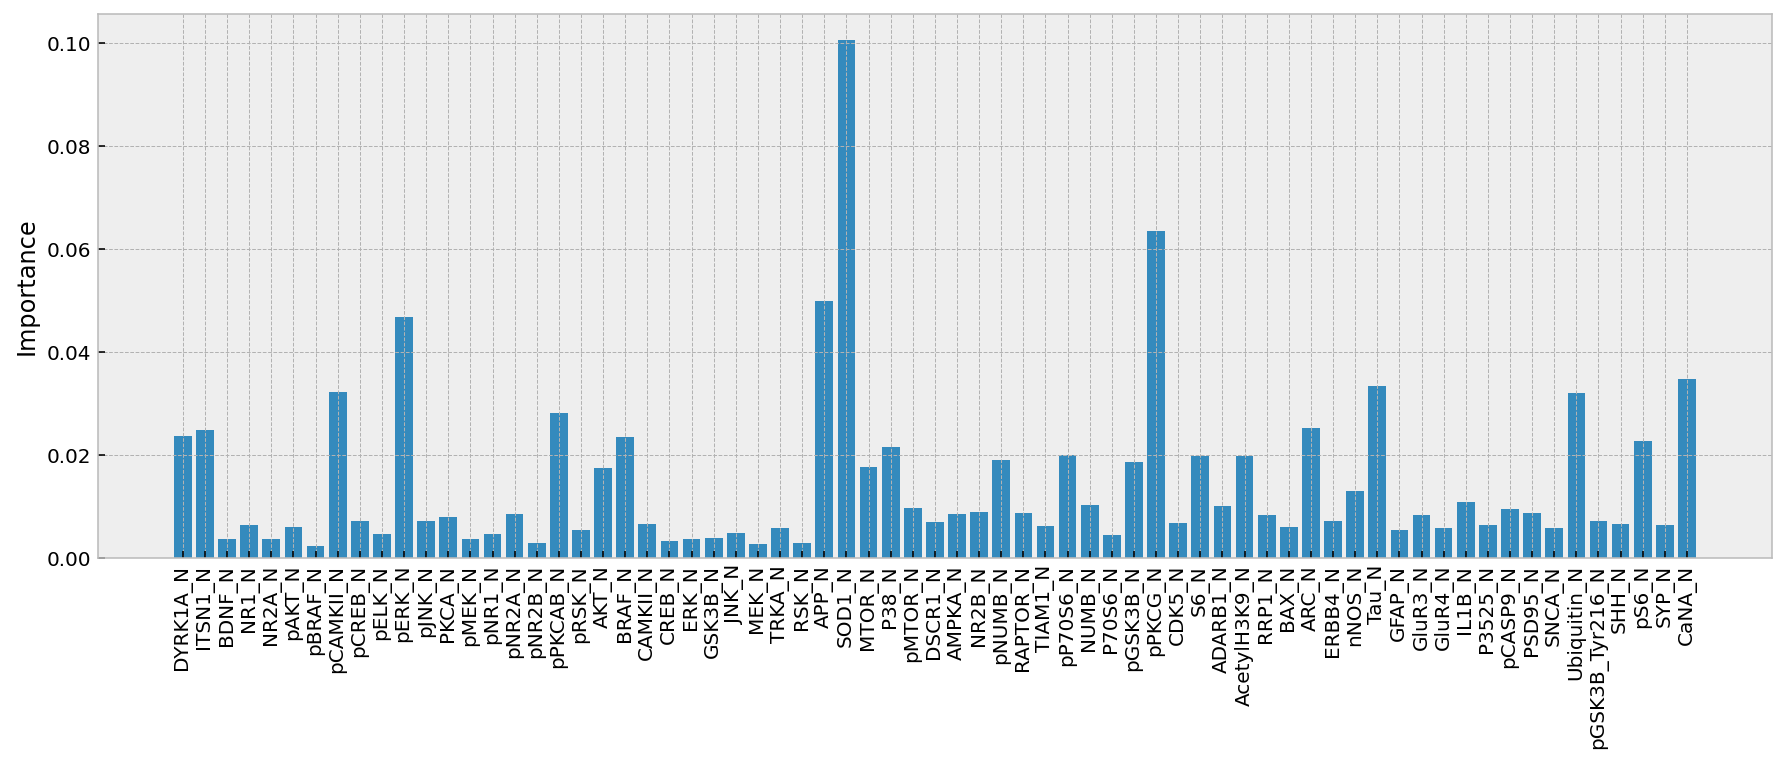

In [34]:
plt.figure(figsize=[15,5])
plt.bar(range(69), model.feature_importances_)
plt.xticks(range(69), expr.columns, rotation=90)
plt.ylabel('Importance');